<img src="Imagenes/1627656919314.jpg" width=100% align="center"/>

<img src="Imagenes/Presentación1.jpg" width=100% align="center"/>

---------------------------------------------------------------------------------------------------------------------------------

<b><h2 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:30px'>Objetivos:</h2></b>

<ol><li style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>Exploración y descripción del Dataset. </li><li style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>Limpieza del dataset y definición de estrategias para datos faltantes. </li>
<li style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>Crear nuevas columnas con valor predictivo.</li>
<li style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>Análisis descriptivo principales variables.</li></ol>

---------------------------------------------------------------------------------------------------------------------------------

<h3 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:25px'>1. Limpieza del dataset y definición de estrategias para datos faltantes.</h3>

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'> El dataset a trabajar es properati.csv. Antes de empezar importamos todas las librerías que vamos a necesitar, levantamos el csv y usamos métodos como <i>info()</i> y <i>describe()</i> para obtener un pantallazo general de la información disponible.</p>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import gc
import psutil

In [4]:
#Levantamos el dataset y consultamos las columnas disponibles
df = pd.read_csv('properatti.csv', sep = ',', encoding = 'utf-8')
df.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [5]:
#Cambiamos el nombre de las columnas para facilitar su comprensión
df.columns = ['Indice', 'Operacion', 'Tipo_Propiedad', 'Barrio', 'Barrio_Pcia_Pais', 'País', 'Provincia', 
                  'Geonames_Id','Lat-Lon', 'Lat', 'Lon', 'Precio', 'Moneda', 'Precio_Pesos', 'Precio_Dolar',
                    'Sup_M2', 'Sup_Cubierta', 'M2_Dolar', 'M2_Peso', 'Pisos', 'Dormitorios', 'Expensas', 'URL',
                      'Descripcion', 'Titulo', 'Imagen']


In [6]:
df.head(5)

,Indice,Operacion,Tipo_Propiedad,Barrio,Barrio_Pcia_Pais,País,Provincia,Geonames_Id,Lat-Lon,Lat,...,Sup_Cubierta,M2_Dolar,M2_Peso,Pisos,Dormitorios,Expensas,URL,Descripcion,Titulo,Imagen
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,http://www.properati.com.ar/15bok_venta_depart...,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...


In [7]:
df.describe()

,Indice,Geonames_Id,Lat,Lon,Precio,Precio_Pesos,Precio_Dolar,Sup_M2,Sup_Cubierta,M2_Dolar,M2_Peso,Pisos,Dormitorios,Expensas
count,121220.000000,1.025030e+05,69670.000000,69670.000000,1.008100e+05,1.008100e+05,1.008100e+05,81892.000000,101313.000000,68617.000000,8.765800e+04,7899.000000,47390.000000,1.426200e+04
mean,60609.500000,3.574442e+06,-34.626210,-59.266290,4.685259e+05,4.229397e+06,2.397006e+05,233.795328,133.050181,2160.086916,6.912216e+03,17.452336,3.080840,5.009234e+03
std,34993.344153,3.541306e+05,1.980936,2.299922,2.260101e+06,6.904714e+06,3.913239e+05,1782.222147,724.351479,2759.288621,2.837864e+04,120.243621,1.860773,1.204403e+05
min,0.000000,3.427208e+06,-54.823985,-75.678931,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.600000,1.510204e+00,1.000000,1.000000,1.000000e+00
25%,30304.750000,3.430234e+06,-34.669065,-58.727040,1.100000e+05,1.583309e+06,8.973388e+04,50.000000,45.000000,1218.181818,1.550000e+03,1.000000,2.000000,1.000000e+03
50%,60609.500000,3.433910e+06,-34.597985,-58.480128,1.850000e+05,2.558452e+06,1.450000e+05,84.000000,75.000000,1800.000000,2.213115e+03,3.000000,3.000000,2.000000e+03
75%,90914.250000,3.836668e+06,-34.441299,-58.395908,4.200000e+05,4.675792e+06,2.650000e+05,200.000000,150.000000,2486.411765,3.355549e+03,6.000000,4.000000,4.000000e+03
max,121219.000000,6.948895e+06,4.545843,-53.733330,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,187000.000000,206333.333333,4.000000e+06,3150.000000,32.000000,1.000150e+07


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Indice            121220 non-null  int64  
 1   Operacion         121220 non-null  object 
 2   Tipo_Propiedad    121220 non-null  object 
 3   Barrio            121197 non-null  object 
 4   Barrio_Pcia_Pais  121220 non-null  object 
 5   País              121220 non-null  object 
 6   Provincia         121220 non-null  object 
 7   Geonames_Id       102503 non-null  float64
 8   Lat-Lon           69670 non-null   object 
 9   Lat               69670 non-null   float64
 10  Lon               69670 non-null   float64
 11  Precio            100810 non-null  float64
 12  Moneda            100809 non-null  object 
 13  Precio_Pesos      100810 non-null  float64
 14  Precio_Dolar      100810 non-null  float64
 15  Sup_M2            81892 non-null   float64
 16  Sup_Cubierta      10

In [9]:
#Creamos una función que nos permita ver el porcentaje de nulos de forma más clara

def nulos_col_info(dataframe):
    '''Calcula e imprime el % de nulos por columna de un dataframe. Lo devuelve por si hay que usarlo'''
    df = pd.DataFrame(dataframe)
    nulos_info_col = round((df.isnull().sum() / df.shape[0]) * 100, 2).sort_values(ascending = False)
    return nulos_info_col

In [10]:
nulos = pd.DataFrame(nulos_col_info(df), columns=['%Nulos'])
nulos

,%Nulos
Pisos,93.48
Expensas,88.23
Dormitorios,60.91
M2_Dolar,43.39
Lat-Lon,42.53
Lat,42.53
Lon,42.53
Sup_M2,32.44
M2_Peso,27.69
Precio_Pesos,16.84


<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Para trabajarlo un poco vamos a eliminar las columnas:</p>
<ul>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Indice (redundante)</li>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Operación (son todas sell)</li>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Pisos (por nulos)</li>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Expensas (por nulos)</li>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>M2_Peso (no fiable por depender de la cotización diaria)</li>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Precio_Pesos (idem anterior)</li>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Precio (a veces se corresponde con Precio_Dolar y a veces con Precio_Pesos)</li>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Moneda (siempre va a ser dólar)</li>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Geonames_Id (no aporta información útil)</li>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>URL (los links están caídos)</li>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Imagen (no la vamos a usar)</li></ul>

In [11]:
#Eliminamos las columnas indicadas y guardamos el resultado en un nuevo dataframe "df_filtrado"

df_filtrado = df.drop(['Indice', 'Operacion', 'Pisos', 'Expensas', 'M2_Peso', 'Precio', 'Precio_Pesos', 'Moneda', 
                        'Geonames_Id', 'URL', 'Imagen'], axis = 1)
gc.collect()
len(df_filtrado)

121220

---------------------------------------------------------------------------------------------------------------------------------

<h3 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:25px'>2. Limpieza del dataset y definición de estrategias para datos faltantes.</h3>

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Para decidir que estrategias seguir con las columnas con datos nulos, determinamos cuáles son las columnas que nos pueden ayudar a determinar como se comporta el precio de las propiedades y de estas, cuales se pueden imputar siguiendo algún criterio lógico. Pisos y Expensas las eliminamos previamente porque era tan alto el índice de nulos que no valía la pena analizar. Las columnas con las que vamos a trabajar son: ['Sup_Cubierta', 'Precio_Dolar', 'Barrio', 'Tipo_Propiedad', 'Sup_M2', 'Dormitorios', 'Descripcion'].</p>


---------------------------------------------------------------------------------------------------------------------------------

<h4 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>2.1 Imputación Sup_Cubierta</h4>

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Para la columna Sup_Cubierta que solo tiene un 16% de datos nulos, vamos a imputar por la media agrupada por Barrio y por Tipo_Propiedad. Antes de calcular la media y para evitar distorsiones vamos a eliminar los outliers también de forma agrupada y eliminando los datos que están a más de dos desvíos del promedio. Un vez que tengamos la media por barrio y por tipo de propiedad, vamos a insertarla en df_filtrado a través de un merge y luego usarla para imputar los nulos en Sup_Cubierta. </p>

In [12]:
#Filtramos outliers de 'Sup_Cubierta'
def es_outlier(s):
    
    lower_limit = s.mean() - (s.std() * 2)
    upper_limit = s.mean() + (s.std() * 2)
    return ~s.between(lower_limit, upper_limit)

df_sin_outliers_cubierta = df_filtrado[~df_filtrado.groupby(['Barrio', 'Tipo_Propiedad'], dropna=False)['Sup_Cubierta'].apply(es_outlier)]
#df_sin_outliers.reset_index(drop=True, inplace=True)

len(df_sin_outliers_cubierta)

97953

In [13]:
#Calculo media sup_cubierta por barrio y por tipo de propiedad
sup_cub_promedio = df_sin_outliers_cubierta.groupby(['Barrio', 'Tipo_Propiedad'])[['Sup_Cubierta']].mean()
sup_cub_promedio.rename(columns = {'Sup_Cubierta':'Sup_Cub_Prom'}, inplace = True)


In [14]:
#Mergeamos el dataframe sup_cub_promedio con df_filtrado
df_filtrado = pd.merge(df_filtrado, sup_cub_promedio, on=['Barrio', 'Tipo_Propiedad'], how='left')

In [15]:
#Finalmente imputamos los datos faltantes en Sup_Cubierta:
df_filtrado.Sup_Cubierta.fillna(df_filtrado.Sup_Cub_Prom, inplace=True)

In [16]:
#Eliminamos los DataFrame provisorios
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)
del sup_cub_promedio
del df_sin_outliers_cubierta
gc.collect()
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

13.580273921457959
13.720866129674436


---------------------------------------------------------------------------------------------------------------------------------

<h4 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>2.2 Imputación Precio_Dolar</h4>

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>La columna Precio_Dolar es muy similar en su composición a la Sup_Cubierta por lo cual vamos a seguir idéntica estrategia. </p>

In [17]:
#Filtramos outliers de 'Precio_Dolar'
def es_outlier(s):
    
    lower_limit = s.mean() - (s.std() * 2)
    upper_limit = s.mean() + (s.std() * 2)
    return ~s.between(lower_limit, upper_limit)

df_sin_outliers_precio = df_filtrado[~df_filtrado.groupby(['Barrio', 'Tipo_Propiedad'], dropna=False)['Precio_Dolar'].apply(es_outlier)]
#df_sin_outliers.reset_index(drop=True, inplace=True)
len(df_sin_outliers_precio)

96384

In [18]:
#Calculo media precio_dolar por barrio y por tipo de propiedad:

precio_promedio = df_sin_outliers_precio.groupby(['Barrio', 'Tipo_Propiedad'])[['Precio_Dolar']].mean()
precio_promedio.rename(columns = {'Precio_Dolar':'Precio_Dolar_Prom'}, inplace = True)

In [19]:
#Mergeamos el dataframe precio_promedio con df_filtrado
df_filtrado = pd.merge(df_filtrado, precio_promedio, on=['Barrio', 'Tipo_Propiedad'], how='left')

In [20]:
#Finalmente imputamos los datos faltantes en Precio_Dolar_Prom:
df_filtrado.Precio_Dolar.fillna(df_filtrado.Precio_Dolar_Prom, inplace=True)

In [21]:
#Eliminamos DataFrames provisorios
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)
del df_sin_outliers_precio
del precio_promedio
gc.collect()
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

13.542695160409778
13.866660055138203


---------------------------------------------------------------------------------------------------------------------------------

<h4 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>2.3 Imputación Sup_M2</h4>

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>La columna Sup_M2 a diferencia de Sup_Cubierta tiene 32% de datos nulos. En consecuencia vamos a seguir dos estrategias, la primera, imputar por la media como venimos haciendo y luego para los nulos que nos queden, imputaremos los datos de la columna Sup_Cubierta, asumiendo para esos casos que la propiedad no tiene espacios descubiertos. </p>

In [22]:
#Filtramos outliers de 'Sup_M2'
def es_outlier(s):
    
    lower_limit = s.mean() - (s.std() * 2)
    upper_limit = s.mean() + (s.std() * 2)
    return ~s.between(lower_limit, upper_limit)

df_sin_outliers_m2 = df_filtrado[~df_filtrado.groupby(['Barrio', 'Tipo_Propiedad'], dropna=False)['Sup_M2'].apply(es_outlier)]
#df_sin_outliers.reset_index(drop=True, inplace=True)

len(df_sin_outliers_m2)

78871

In [23]:
#Calculo media Sup_m2 por barrio y por tipo de propiedad:

supm2_promedio = df_sin_outliers_m2.groupby(['Barrio', 'Tipo_Propiedad'])[['Sup_M2']].mean()
supm2_promedio.rename(columns = {'Sup_M2':'Sup_M2_Prom'}, inplace = True)

In [24]:
#Mergeamos el dataframe sup_m2_promedio con df_filtrado
df_filtrado = pd.merge(df_filtrado, supm2_promedio, on=['Barrio', 'Tipo_Propiedad'], how='left')

In [25]:
#Imputamos los datos faltantes en Sup_m2:
df_filtrado.Sup_M2.fillna(df_filtrado.Sup_M2_Prom, inplace=True)

In [26]:
#Imputamos los últimos datos faltantes en Sup_m2:
df_filtrado.Sup_M2.fillna(df_filtrado.Sup_Cubierta, inplace=True)

In [27]:
#Eliminamos DataFrames provisorios
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)
del df_sin_outliers_m2
del supm2_promedio
gc.collect()
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

13.820476584251047
13.791259462142436


---------------------------------------------------------------------------------------------------------------------------------

<h4 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>2.4 Imputación Barrio.</h4>

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>La columna Barrio tiene muy pocos datos nulos. Luego de observar los datos nulos pudimos determinar que son 23 casos y gracias a la columna Barrio_Pcia_Pais vemos todos pertenecen a Tigre. Imputamos por el valor 'Tigre'. </p>

In [28]:
df[df.Barrio.isnull() == True]

,Indice,Operacion,Tipo_Propiedad,Barrio,Barrio_Pcia_Pais,País,Provincia,Geonames_Id,Lat-Lon,Lat,...,Sup_Cubierta,M2_Dolar,M2_Peso,Pisos,Dormitorios,Expensas,URL,Descripcion,Titulo,Imagen
6489,6489,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4008968545,-58.63809847",-34.400897,...,240.0,2708.333333,2708.333333,NaN,NaN,NaN,http://www.properati.com.ar/15ui7_venta_casa_t...,"Espectacular casa moderna de una planta, con a...",Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/7/vQjgbHSz1fKXxy...
10201,10201,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.400704,-58.638067",-34.400704,...,300.0,NaN,1783.333333,NaN,5.0,NaN,http://www.properati.com.ar/166p5_venta_casa_t...,Corredor Responsable: SABRINA COCCONI - CSI 62...,VENTA CASA SANTA MARÍA DE TIGRE COUNTRY BARRIO...,https://thumbs4.properati.com/1/FABpKIJMaoAO3t...
11451,11451,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4026880384,-58.6262613379",-34.402688,...,270.0,253.456221,2037.037037,NaN,NaN,NaN,http://www.properati.com.ar/16bpd_venta_casa_t...,MUY LINDA CASA EN EXCELENTE UBICACION!! Superf...,SANTA MARIA DE TIGRE IMPECABLE,https://thumbs4.properati.com/5/fwH9L71hW2rW7V...
14839,14839,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007994779,-58.6381735719",-34.400799,...,200.0,2000.000000,2400.000000,NaN,NaN,NaN,http://www.properati.com.ar/16tal_venta_casa_b...,Muy linda casa de estilo clásico.-Planta baja;...,Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/1/3ZbPSffTY38y7v...
18622,18622,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4032781195,-58.6263503945",-34.403278,...,340.0,3814.705882,3814.705882,NaN,NaN,NaN,http://www.properati.com.ar/177ee_venta_casa_t...,Casa con increible vista al lago con playa de...,Casa con increible vista al lago con playa y m...,https://thumbs4.properati.com/0/52JCH1PKYCOMe6...
21922,21922,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.399704,-58.638405",-34.399704,...,220.0,NaN,2000.000000,NaN,5.0,NaN,http://www.properati.com.ar/17gy5_venta_casa_s...,Corredor Responsable: Matias Castelli - CUCICB...,Venta Casa - Barrio Santa Maria de Tigre,https://thumbs4.properati.com/8/oO7kmFPYNm8DYr...
23664,23664,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4005161998,-58.6417999185",-34.400516,...,294.0,1632.653061,1632.653061,NaN,NaN,NaN,http://www.properati.com.ar/17mb5_venta_casa_t...,EXCELENTE CASA CLASICA con grandes ventanas y ...,CASA EN VENTA EN SANTA MARIA DE TIGRE CON RENTA,https://thumbs4.properati.com/2/LQCwH6txpFqetn...
24722,24722,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.4007292,-58.6377783",-34.400729,...,270.0,1677.215190,1962.962963,NaN,NaN,NaN,http://www.properati.com.ar/17oz1_venta_casa_t...,"EN EXCLUSIVIDAD!!!!!!Lindísima casa, muy lumin...",Venta de casa en Santa María de Tigre,https://thumbs4.properati.com/0/Nhx4NejZaQACap...
38856,38856,sell,house,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.425087,-58.5796585",-34.425087,...,550.0,NaN,2454.545455,NaN,NaN,NaN,http://www.properati.com.ar/18mcb_venta_casa_t...,SANTA MARIA DE TIGRE- AL RIO - ESPECTACULAR CA...,"Casa (barrio cerrado), Venta",https://thumbs4.properati.com/2/Izq8d5o8ti3kJy...
45970,45970,sell,apartment,NaN,|Argentina|Bs.As. G.B.A. Zona Norte|Tigre||,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.396074,-58.63738",-34.396074,...,27.0,1727.272727,3518.518519,NaN,1.0,NaN,http://www.properati.com.ar/1958f_venta_depart...,"EDIFICIO ZERENA – EL PALMAR, NORDELTA. Torre 2...",Excelente monoambiente. Barrio El Palmar. Con...,https://thumbs4.pr

In [29]:
#Imputamos los datos faltantes en Barrio:
df_filtrado.Barrio.fillna('Tigre', inplace=True)

---------------------------------------------------------------------------------------------------------------------------------

<h4 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>2.5 Imputación Dormitorios.</h4>

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>La columna Dormitorios tiene 60% de datos nulos. A pesar de eso vamos a tratar de determinar una media de dormitorios por m2. Para ellos primero vamos a filtrar los outliers, los nulos y los correspondientes a 'store' (porque no deberían tener dormitorios). Luego cruzando Sup_Cubierta con Dormitorios vamos a tratar de determinar cual el metraje promedio por cada dormitorio. Estamos asumiendo varias cosas sobre pocas observaciones, motivo por el cual este dato será utilizado con mucha cautela.
Para eliminar los outliers nos basamos en lo que observamos del data set, donde practicamente no hay viviendas con más de 15 dormitorios.</p>

In [30]:
#Filtramos outliers de 'Dormitorios'
df_sin_outliers_dormitorios= df_filtrado[df_filtrado.Tipo_Propiedad != 'store']

df_sin_outliers_dormitorios = df_filtrado[df_filtrado.Dormitorios < 15]

len(df_sin_outliers_dormitorios)

47285

In [31]:
#Creamos una nueva columna en df_sin_outliers_dormitorios que relacione Sup_Cubierta con Dormitorios.
df_sin_outliers_dormitorios['M2_Dormitorios_Prom'] = round(df_sin_outliers_dormitorios.Sup_Cubierta / df_sin_outliers_dormitorios.Dormitorios, 0)
df_sin_outliers_dormitorios.describe()

C:\Users\mstokle\Anaconda3\envs\clase10\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Lat,Lon,Precio_Dolar,Sup_M2,Sup_Cubierta,M2_Dolar,Dormitorios,Sup_Cub_Prom,Precio_Dolar_Prom,Sup_M2_Prom,M2_Dormitorios_Prom
count,42077.000000,42077.000000,4.664500e+04,47075.000000,47049.000000,25194.000000,47285.000000,46840.000000,4.645600e+04,46461.000000,47049.000000
mean,-34.817206,-59.205040,2.176770e+05,197.785939,106.177688,2631.051087,3.044877,95.473475,1.831619e+05,160.839866,35.830581
std,2.129619,2.371926,3.573654e+05,1499.619745,342.299748,4124.178635,1.684817,61.664052,1.222036e+05,435.998470,138.001564
min,-53.801885,-75.678931,0.000000e+00,1.000000,1.000000,0.600000,1.000000,20.000000,1.111100e+04,32.000000,0.000000
25%,-34.724684,-58.695896,8.973388e+04,56.153846,45.000000,1318.020142,2.000000,58.508906,9.927510e+04,62.253990,22.000000
50%,-34.602334,-58.464647,1.360253e+05,77.000000,66.915126,1968.122936,3.000000,66.693182,1.502989e+05,75.494173,28.000000
75%,-34.447361,-58.374815,2.270829e+05,200.000000,124.000000,2626.262626,4.000000,124.722222,2.266014e+05,207.408451,38.000000
max,4.545843,-54.580727,4.654544e+07,200000.000000,49000.000000,206333.333333,14.000000,2796.666667,3.224375e+06,27879.166667,24500.000000


In [32]:
#Calculo media Dormitorios por barrio y por tipo de propiedad:

m2_dormitorios_promedio = df_sin_outliers_dormitorios.groupby(['Tipo_Propiedad'])[['M2_Dormitorios_Prom']].mean()

In [33]:
#Mergeamos el dataframe dormitorios_promedio con df_filtrado
df_filtrado = pd.merge(df_filtrado, m2_dormitorios_promedio, on=['Tipo_Propiedad'], how='left')

In [34]:
#Creamos la columna que estima la cantidad de dormitorios según superficie cubierta
df_filtrado['Dormitorios_Prom'] = round(df_filtrado.Sup_Cubierta /df_filtrado.M2_Dormitorios_Prom, 0)

In [35]:
#Imputamos los datos faltantes en Dormitorios:
df_filtrado.Dormitorios.fillna(df_filtrado.Dormitorios_Prom, inplace=True)

In [36]:
#Eliminamos DataFrames provisorios
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)
del df_sin_outliers_dormitorios
del m2_dormitorios_promedio
gc.collect()
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

13.64274314260532
13.735985139617494


---------------------------------------------------------------------------------------------------------------------------------

In [37]:
#Por últimos eliminamos las columnas de valores promedio que creamos.
df_filtrado = df_filtrado.drop(['Precio_Dolar_Prom', 'Sup_Cub_Prom', 'Dormitorios_Prom', 'Sup_M2_Prom','M2_Dormitorios_Prom'], axis = 1)
gc.collect()


23

---------------------------------------------------------------------------------------------------------------------------------

<h3 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:25px'>3. Creación de columnas con valor predictivo.</h3>

<h4 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>3.1 Columna espacio descubierto.</h4>

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>A partir de la diferencia entre superficie total (Sup_M2) y la superficia cubierta (Sup_Cubierta), calculamos una nueva variable llamada Espacio_Descubierto para  indicar las propiedades que tienen espacios al aire libre. No nos quedamos con el resultado de la diferencia entre las dos columnas, sino que indicamos con 1 aquellos que lo tienen y 0 a los que no. Una vez calculada la incorporamos a al dataset.</p>

In [38]:
patio = pd.Series(df_filtrado.apply(lambda x: 1 if x['Sup_M2'] > x['Sup_Cubierta'] else 0, axis = 1), 
                   name = 'Espacio_Descubierto')

df_filtrado = df_filtrado.join(patio, how='left')


In [39]:
df_filtrado.Espacio_Descubierto.sum()

83140

---------------------------------------------------------------------------------------------------------------------------------

<h4 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>3.2 Columna Valor_M2_Promedio</h4>

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Posteriormente vamos a calcular el valor promedio del M2. Para esto vamos a usar los datos de Sup_Cubierta y Precio_Dolar. Antes de empezar con los cálculos verificamos que no haya datos con formatos incorrectos en ambas columnas.</p>

In [40]:
#Controlo que todos los datos de Sup_Cubierta sean tipo float
a = [x for x in df_filtrado.Sup_Cubierta if type(x) != float]
print(f'Los datos de Sup_Cubierta con formato erróneo son: {len(a)}')

#Hago lo mismo con Precio_Dolar
a = [x for x in df_filtrado.Precio_Dolar if type(x) != float]
print(f'Los datos de Precio_Dolar con formato erróneo son: {len(a)}')





Los datos de Sup_Cubierta con formato erróneo son: 0
Los datos de Precio_Dolar con formato erróneo son: 0


<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Ahora filtramos el dataset para quedarnos unicamente con las filas donde tengo información sobre Barrio, Sup_Cubierta y Precio_Dolar simultáneamente, porque son las filas que me van a permitir calcular el promedio del M2 construido según la ubicación.</p>

In [41]:
df_filtrado = df_filtrado[(df_filtrado.Sup_Cubierta.isnull() == False) & (df_filtrado.Precio_Dolar.isnull() == False) & (df_filtrado.Barrio.isnull() == False)]
df_filtrado = df_filtrado[df_filtrado.Sup_Cubierta > 1]
print(len(df_filtrado))

#Reviso que no tenga nulos en las columnas de mi interes:
nulos_col_info(df_filtrado)

119382


Lat-Lon                42.67
Lat                    42.67
Lon                    42.67
M2_Dolar               42.66
Tipo_Propiedad          0.00
Barrio                  0.00
Barrio_Pcia_Pais        0.00
País                    0.00
Provincia               0.00
Precio_Dolar            0.00
Sup_M2                  0.00
Sup_Cubierta            0.00
Dormitorios             0.00
Descripcion             0.00
Titulo                  0.00
Espacio_Descubierto     0.00
dtype: float64

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Creamos una columna 'M2_Dolar_2' donde calculamos el valor del M2 cubierto en dólares.</p>

In [42]:
df_filtrado['M2_Dolar_2'] = df_filtrado['Precio_Dolar'] / df_filtrado['Sup_Cubierta']
print(round(df_filtrado['M2_Dolar_2'].describe(),2))
print(df_filtrado.M2_Dolar_2.quantile(0.985))
print(df_filtrado.M2_Dolar_2.quantile(0.015))

count     119382.00
mean        2428.36
std         4525.52
min            0.00
25%         1298.74
50%         1852.28
75%         2642.86
max      1022831.38
Name: M2_Dolar_2, dtype: float64
11307.148288572933
390.5163871951219


<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Filtramos los valores de M2_Dolar_2 exagerados. Vamos a considerar un punto de corte de uSs11.500 que deja afuera al 1,5% de valores más altos y un límite inferior de 300 que deja afuera menos del 1,5% de valores más bajos.

In [43]:
df_filtrado = df_filtrado[(df_filtrado.M2_Dolar_2 > 300) & (df_filtrado.M2_Dolar_2 < 11500)]
len(df_filtrado)

116506

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Una vez realizado esto calculamos el valor del M2 promedio en dólares por barrio y tipo de propiedad.</p>

In [44]:
df_valor_m2 = df_filtrado.groupby(['Barrio', 'Tipo_Propiedad'])[['M2_Dolar_2']].mean()
df_valor_m2.rename(columns={'M2_Dolar_2':'M2_Dolar_Prom'}, inplace=True)
print(df_valor_m2.head(4))
df_valor_m2.describe()

                                        M2_Dolar_Prom
Barrio                  Tipo_Propiedad               
 Country Maschwitz Club house             1303.311966
 los alamos             apartment         1990.243902
9 de Abril              house              687.500000
                        store              750.000000


,M2_Dolar_Prom
count,1773.000000
mean,1736.656773
std,965.342070
min,311.665183
25%,1119.924901
50%,1524.612638
75%,2074.237156
max,10000.000000


<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Incorporamos la nueva columna df_filtrado</p>

In [45]:
#Agregamos la columna M2_Dolar_Prom en df_filtrado:
df_filtrado = pd.merge(df_filtrado, df_valor_m2, on=['Barrio', 'Tipo_Propiedad'], how='left')
df_filtrado.head(3)


,Tipo_Propiedad,Barrio,Barrio_Pcia_Pais,País,Provincia,Lat-Lon,Lat,Lon,Precio_Dolar,Sup_M2,Sup_Cubierta,M2_Dolar,Dormitorios,Descripcion,Titulo,Espacio_Descubierto,M2_Dolar_2,M2_Dolar_Prom
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,55.000000,40.000000,1127.272727,1.0,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1,1550.000000,1988.965879
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,68.867347,66.915126,NaN,2.0,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,1,2241.645632,1703.091783
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,55.000000,55.000000,1309.090909,2.0,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,0,1309.090909,2135.501737


In [46]:
#Borramos el dataframe provisorio:
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)
del df_valor_m2
gc.collect()
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

13.720136916976218
13.527090008667908


<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Creamos una serie, con la diferencia de M2_Dolar_Prom con M2_Dolar_2 para evaluar como se comporta el valor promedio.</p>

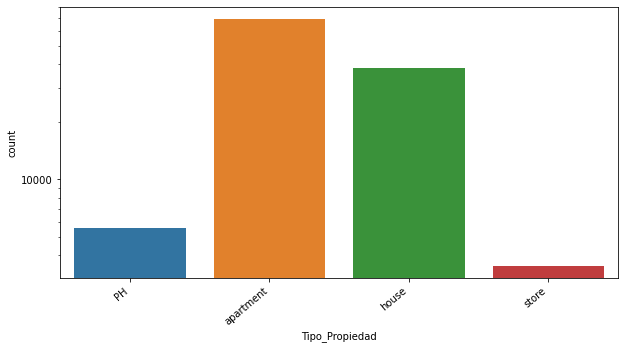

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec

plt.figure(figsize=(10,5))
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
ax = sns.countplot(data = df_filtrado, x = "Tipo_Propiedad")
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")


plt.show()

C:\Users\mstokle\Anaconda3\envs\clase10\lib\site-packages\IPython\core\pylabtools.py:137: UserWarning: There are no gridspecs with layoutboxes. Possibly did not call parent GridSpec with the figure= keyword
  fig.canvas.print_figure(bytes_io, **kw)


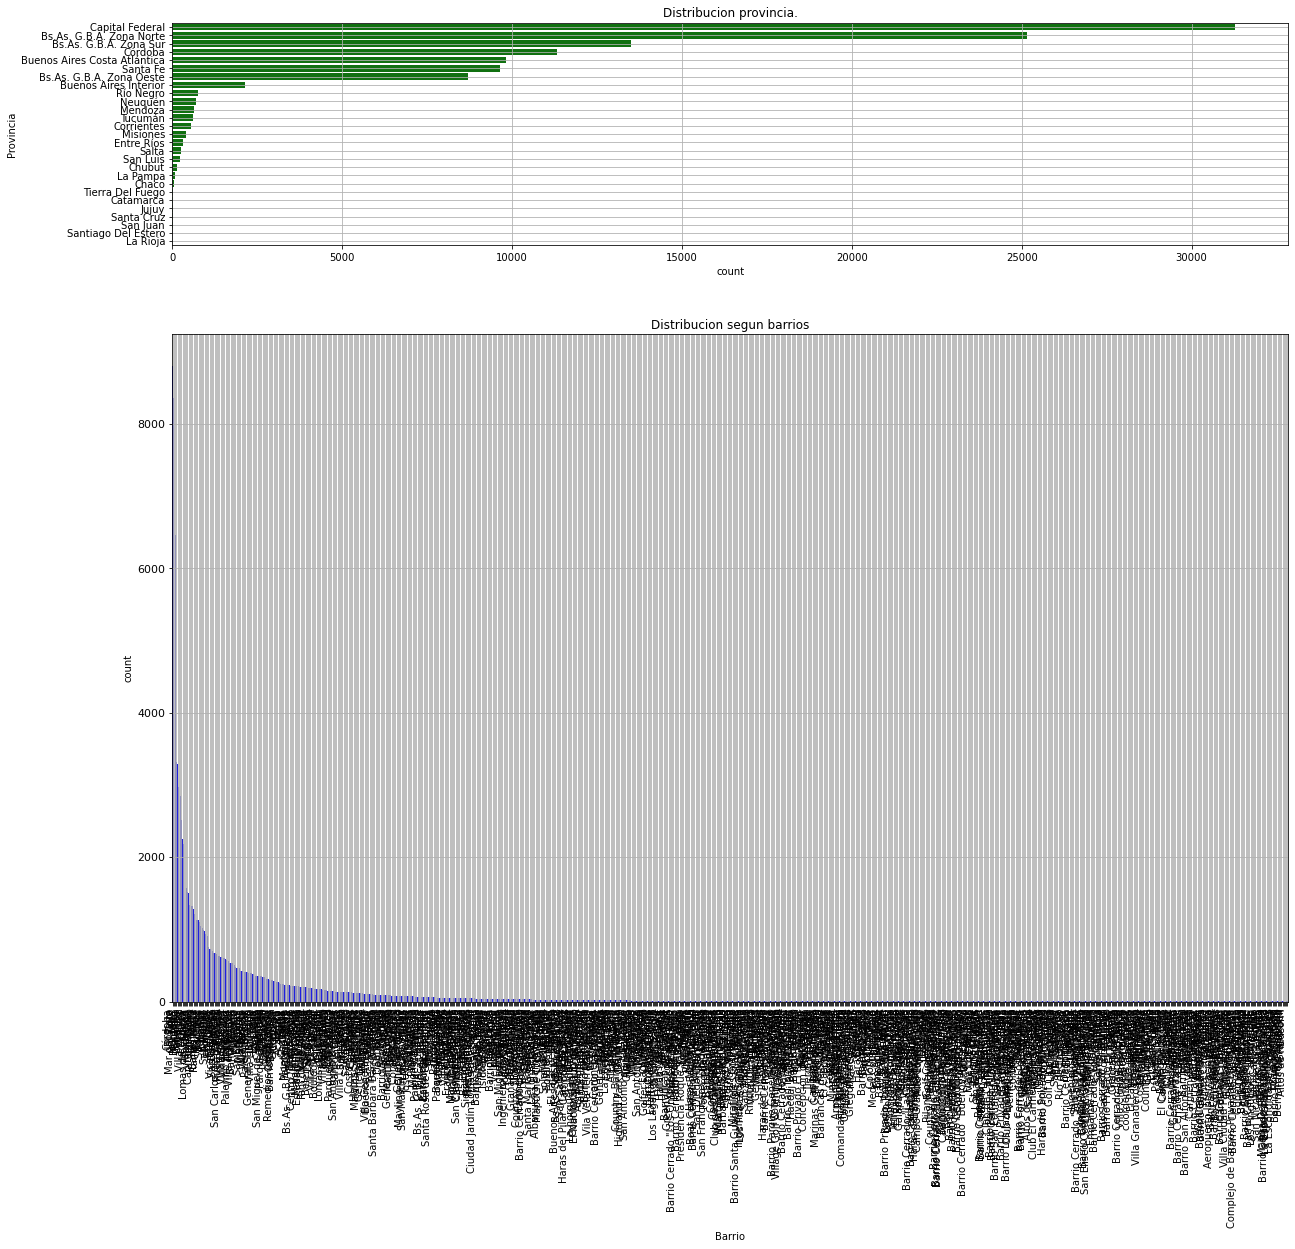

In [48]:
fig= plt.subplots(figsize=(20,18),constrained_layout=True)
grid = gridspec.GridSpec(2, 1, height_ratios=[1, 3])

ax1=plt.subplot(grid[0])
sns.countplot(data=df_filtrado,y="Provincia",order=df_filtrado["Provincia"].value_counts().index,ax=ax1,color="g")

ax1.set_yticklabels(ax1.get_yticklabels(),fontsize="medium")
ax1.set_title("Distribucion provincia.", fontsize= 'large')

ax2=plt.subplot(grid[1])
sns.countplot(data=df_filtrado,x="Barrio",order=df_filtrado["Barrio"].value_counts().index,ax=ax2,color="b")


ax2.set_title("Distribucion segun barrios", fontsize= 'large')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90,ha="right")
plt.yticks(fontsize= 11)
ax1.grid()
ax2.grid()
plt.show()

count    116506.00
mean         -0.00
std         983.22
min       -9978.33
25%        -254.67
50%         108.88
75%         465.78
max        6407.22
Name: Error, dtype: float64

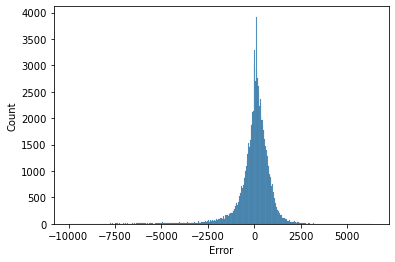

In [49]:
error = pd.Series(df_filtrado['M2_Dolar_Prom'] - df_filtrado['M2_Dolar_2'], name = 'Error')
sns.histplot(data=error)
round(error.describe(),2)


---------------------------------------------------------------------------------------------------------------------------------

<h4 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>3.3 Columna Amenities</h4>

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'> Utilizando expresiones regulares vamos a  extraer información útil de la columna 'Descripción'. Con la biblioteca re vamos a definir patrones que nos permitan identificar "amenities". Vamos a crear una columna por cada amenitie y en el caso que la propiedad la tenga lo vamos a reflejar con un 1, caso contrario, 0. Por últimos creamos una columna que acumule todas las amenities que esa propiedad tenía.</p>


In [50]:
import re
#armamos el patron del grupo pileta
pattern_nombre_pileta = "(?P<pileta>\spileta|piscina|Piscina|Pileta|PISCINA|PILETA|PILTEA|PICSINA|pileta.|piscina.|Piscina.|Pileta.|PISCINA.|PILETA.|PILTEA.|PICSINA.)"
#compilamos el patron
pattern_nombre_regex_pileta = re.compile(pattern_nombre_pileta)
#Convertimos la Serie en tipo string
descripcion_series = df_filtrado.Descripcion.apply(str)
#Buscamos el match de las palabras que describen "pileta" en la serie
resultado_pileta = descripcion_series.apply(lambda x: pattern_nombre_regex_pileta.search(x))
#pasamos la serie pileta_match a binario. en caso de tener pileta, tomara el valor de 1. sera 0 en el otro caso.
pileta_match = resultado_pileta.apply(lambda x: x if x is None else x.group('pileta'))
pileta_match=pileta_match.apply(lambda x: 0 if x is None else 1)
df_amenities=pd.DataFrame()
df_amenities['Pileta']=pileta_match
df_amenities.head()

,Pileta
0,0
1,0
2,0
3,0
4,0


In [51]:
#armamos el patron del grupo cochera
pattern_nombre_cochera = "(?P<cochera>\scochera|Cochera|Garage|garage|COCHERA|GARAGE|GARAJE|Garaje|garaje|Estacionamiento|ESTACIONAMIENTO)"
#compilamos el patron
pattern_nombre_regex_cochera = re.compile(pattern_nombre_cochera)
#Buscamos el match de las palabras que describen "cochera" en la serie
resultado_cochera = descripcion_series.apply(lambda x: pattern_nombre_regex_cochera.search(x))
#pasamos la serie cohera_match a binario. en caso de tener cochera, tomara el valor de 1. sera 0 en el otro caso
cochera_match = resultado_cochera.apply(lambda x: x if x is None else x.group('cochera'))
cochera_match=cochera_match.apply(lambda x: 0 if x is None else 1)
df_amenities['Cochera']=cochera_match
df_amenities.head()

,Pileta,Cochera
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


In [52]:
#armamos el patron del grupo parrilla
pattern_nombre_parrilla = "(?P<parrilla>\sparrilla|Parrilla|Parrillero|PARRILLA|Parila|Parilla|Parrila|PARRILLERO)"
#compilamos el patron
pattern_nombre_regex_parrilla = re.compile(pattern_nombre_parrilla)
#Buscamos el match de las palabras que describen "parrilla" en la serie
resultado_parrilla = descripcion_series.apply(lambda x: pattern_nombre_regex_parrilla.search(x))
#pasamos la serie parrila_match a binario. en caso de tener parrilla, tomara el valor de 1. sera 0 en el otro caso
parrilla_match = resultado_parrilla.apply(lambda x: x if x is None else x.group('parrilla'))
parrilla_match=parrilla_match.apply(lambda x: 0 if x is None else 1)
df_amenities['Parrilla']=parrilla_match
df_amenities.head()

,Pileta,Cochera,Parrilla
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,0,0


In [53]:
#armamos el patron del grupo "Salon de usos multiples"(SUM)
pattern_nombre_SUM = "(?P<SUM>\sSalon\sde\susos\smultiples|salon\sde\susos\smultiples|Salon\sde\sUsos\sMultiples|Salón\sde\sUsos\sMúltiples|salón\sde\susos\smúltiples|SUM|sum|Sum|Quincho|QUINCHO|quincho)"
#compilamos el patron
pattern_nombre_regex_SUM = re.compile(pattern_nombre_SUM)
#Buscamos el match de las palabras que describen "SUM" en la serie
resultado_SUM = descripcion_series.apply(lambda x: pattern_nombre_regex_SUM.search(x))
#pasamos la serie SUM_match a binario. en caso de tener SUM, tomara el valor de 1. sera 0 en el otro caso
SUM_match = resultado_SUM.apply(lambda x: x if x is None else x.group('SUM'))
SUM_match=SUM_match.apply(lambda x: 0 if x is None else 1)
df_amenities['SUM']=SUM_match
df_amenities.head()

,Pileta,Cochera,Parrilla,SUM
0,0,0,0,0
1,0,1,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [54]:
#armamos el patron del grupo "gimnasio"
pattern_nombre_gym = "(?P<gimnasio>\sGYM|gym|gimnasio|GIMNASIO|GIM|gim|Gym|Gimnasio)"
#compilamos el patron
pattern_nombre_regex_gym = re.compile(pattern_nombre_gym)
#Buscamos el match de las palabras que describen "gimnasio" en la serie
resultado_gym = descripcion_series.apply(lambda x: pattern_nombre_regex_gym.search(x))
#pasamos la serie gym_match a binario. en caso de tener SUM, tomara el valor de 1. sera 0 en el otro caso
gym_match = resultado_gym.apply(lambda x: x if x is None else x.group('gimnasio'))
gym_match=gym_match.apply(lambda x: 0 if x is None else 1)
df_amenities['gimnasio']=gym_match
df_amenities.head()

,Pileta,Cochera,Parrilla,SUM,gimnasio
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [55]:
#Generamos una columna que contenga por cada propiedad la suma de los "amenities".
#Esta columna nos ayudara a estimar el precio por M2.
df_amenities['suma_amenities']=df_amenities.Pileta+df_amenities.Cochera+df_amenities.Parrilla+df_amenities.SUM+df_amenities.gimnasio
df_amenities.head()
#Ahora anexamos la columna al data frame original ya "limpio"
df_filtrado["suma_amenities"]=df_amenities['suma_amenities']
df_filtrado.head()
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116506 entries, 0 to 116505
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Tipo_Propiedad       116506 non-null  object 
 1   Barrio               116506 non-null  object 
 2   Barrio_Pcia_Pais     116506 non-null  object 
 3   País                 116506 non-null  object 
 4   Provincia            116506 non-null  object 
 5   Lat-Lon              66777 non-null   object 
 6   Lat                  66777 non-null   float64
 7   Lon                  66777 non-null   float64
 8   Precio_Dolar         116506 non-null  float64
 9   Sup_M2               116506 non-null  float64
 10  Sup_Cubierta         116506 non-null  float64
 11  M2_Dolar             67094 non-null   float64
 12  Dormitorios          116506 non-null  float64
 13  Descripcion          116504 non-null  object 
 14  Titulo               116506 non-null  object 
 15  Espacio_Descubier

In [57]:
df_filtrado[df_filtrado.Barrio == "Adrogué"]

,Tipo_Propiedad,Barrio,Barrio_Pcia_Pais,País,Provincia,Lat-Lon,Lat,Lon,Precio_Dolar,Sup_M2,Sup_Cubierta,M2_Dolar,Dormitorios,Descripcion,Titulo,Espacio_Descubierto,M2_Dolar_2,M2_Dolar_Prom,suma_amenities
4439,house,Adrogué,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"-34.804597,-58.3850713",-34.804597,-58.385071,190000.0,255.000000,145.000000,745.098039,3.0,CODIGO: 1520-MYR1930 ubicado en: Castelli 1300...,Chalet de 2 dormitorios en Adrogué,1,1310.344828,1671.153861,2
4897,house,Adrogué,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"-34.8115141,-58.3975856",-34.811514,-58.397586,180000.0,221.181416,178.929972,NaN,4.0,"Venta de Casa 4 AMBIENTES en Adrogué, Almirant...",CASA EN VENTA,1,1005.980150,1671.153861,2
5025,house,Adrogué,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"-34.801366,-58.3795326",-34.801366,-58.379533,210000.0,115.000000,178.929972,1826.086957,4.0,CODIGO: 71 ubicado en: RAMIREZ 1716 - Publica...,DUPLEX RAMIREZ,0,1173.643508,1671.153861,1
5026,apartment,Adrogué,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"-34.792256,-58.3826387",-34.792256,-58.382639,99500.0,74.481132,46.000000,NaN,1.0,CODIGO: 72 ubicado en: MITRE 1947 - Publicad...,PORTAL DE MARMOL,1,2163.043478,2497.981247,1
5027,apartment,Adrogué,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,"-34.7996238,-58.3830197",-34.799624,-58.383020,94000.0,74.481132,50.000000,NaN,2.0,CODIGO: 74 ubicado en: DRUMOND 1056 - Publica...,DEPARTAMENTOS DRUMOND - FINANCIADOS,1,1880.000000,2497.981247,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113856,store,Adrogué,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,260000.0,221.166667,116.933333,NaN,1.0,LOCAL INMEJORABLE ZONA COMERCIAL A MTS DE ESTE...,Local - Adrogue,1,2223.489168,3013.760472,0
113869,apartment,Adrogué,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,179000.0,88.000000,88.000000,2034.090909,3.0,"DEPARTAMENTO TIPO DUPLEX. PB: LIVING COMEDOR,...",Departamento - Adrogue,0,2034.090909,2497.981247,2
114455,apartment,Adrogué,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,268000.0,74.481132,68.200000,NaN,2.0,AMPLIO Y LUMINOSO DEPARTAMENTO DE 4 AMBIENTES ...,Departamento - Adrogue,1,3929.618768,2497.981247,0
115529,house,Adrogué,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,NaN,NaN,195000.0,116.000000,116.000000,1681.034483,2.0,"LIVING COMEDOR, COCINA COMEDOR, BAÑO, UN DORMI...",Casa - Adrogue,0,1681.034483,1671.153861,0


In [56]:
df_filtrado.to_csv("dataset_properatti_filtrado.csv")

In [ ]:
figz= plt.figure()
df_filtrado_sin_store = df_filtrado[df_filtrado.Tipo_Propiedad != "store"]
mask_cols= ["Tipo_Propiedad","Precio_Dolar","Sup_Cubierta","Sup_M2","suma_amenities"]
graph=sns.pairplot(df_filtrado_sin_store[mask_cols],hue="Tipo_Propiedad")
graph.fig.set_size_inches(16,8)
plt.grid()
plt.show()

---------------------------------------------------------------------------------------------------------------------------------

<h3 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:25px'>4. Análisis descriptivo principales variables.</h3>

Faltaría agregar visualizaciones (A evaluar):
- Gráficos de barrios con más propiedades en venta
- Mapa de calor de cantidad de propiedad en venta
- Mapa de calor por 'M2_Promedio'
- Mapa de calor por 'Sup_Cubierta' (ver)
- Barrios más caros
- Barrios más baratos
- Gráfico del valor del m2 según tipos de propiedades
- Histograma del valor del 'M2_Promedio' (opcional: según tipo de propiedad)


Visualizaciones de Barrios con más propiedades en venta

In [ ]:
df_mas_prop = df_filtrado.groupby(["Barrio"]).size().reset_index(name="Count").nlargest(10, "Count")
df_mas_prop

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Barrio", y="Count", data=df_mas_prop,
            label="Propiedades publicadas")
ax.set_title("Propiedades publicadas", fontsize= 'large')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="right")
plt.show()

Visualizaciones de Top 10 Barrios más caros

In [ ]:
#En los barrios mas caros y mas baratos filtramos barrios con mas de 5 propiedades para asegurarnos que haya propiedades individuales que generen una distorsion (Ej. Capilla del Rosario)
df_mas_caros =  df_filtrado.groupby(["Barrio","M2_Dolar_Prom"]).size().reset_index(name="Count")
df_mas_caros = df_mas_caros[df_mas_caros.Count > 5].groupby(["Barrio"])[["M2_Dolar_Prom"]].mean().reset_index().nlargest(10, "M2_Dolar_Prom")
df_mas_caros

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Barrio", y="M2_Dolar_Prom", data=df_mas_caros,
            label="Barrios mas caros")
ax.set_title("Barrios mas caros por m2", fontsize= 'large')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="right")
plt.show()

Visualizaciones de Top 10 Barrios más baratos

In [ ]:
df_mas_baratos =  df_filtrado.groupby(["Barrio","M2_Dolar_Prom"]).size().reset_index(name="Count")
df_mas_baratos = df_mas_baratos[df_mas_baratos.Count > 5].groupby(["Barrio"])[["M2_Dolar_Prom"]].mean().reset_index().nsmallest(10, "M2_Dolar_Prom")
df_mas_baratos

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Barrio", y="M2_Dolar_Prom", data=df_mas_baratos,
            label="Barrios mas baratos")
ax.set_title("Barrios mas baratos por m2", fontsize= 'large')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="right")
plt.show()

Heatmap de cantidad de propiedades por Provincia y Tipo

In [ ]:
df_heatmap_cantidad = df_filtrado.groupby(["Provincia","Tipo_Propiedad"]).size().reset_index(name="Count")
df_heatmap_cantidad

In [ ]:
df_heatmap_pivot_cant = df_heatmap_cantidad.pivot("Provincia", "Tipo_Propiedad", "Count")
df_heatmap_pivot_cant

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_heatmap_pivot_cant, robust=True, linewidths=.5, ax=ax)

Heatmap de M2_Promedio de propiedades por Provincia y Tipo 

In [ ]:
df_heatmap_m2_promedio = df_filtrado.groupby(["Provincia","Tipo_Propiedad"])[["M2_Dolar_Prom"]].mean().reset_index()
df_heatmap_m2_promedio

In [ ]:
df_heatmap_pivot_m2_prom = df_heatmap_m2_promedio.pivot("Provincia", "Tipo_Propiedad", "M2_Dolar_Prom")
df_heatmap_pivot_m2_prom

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_heatmap_pivot_m2_prom, robust=True, linewidths=.5, ax=ax)

Heatmap de Superficie cubierta por Provincia y Tipo de Propiedad

In [ ]:
df_heatmap_sup_cubierta = df_filtrado.groupby(["Provincia","Tipo_Propiedad"])[["Sup_Cubierta"]].mean().reset_index()
df_heatmap_sup_cubierta

In [ ]:
df_heatmap_pivot_sup_cubierta = df_heatmap_sup_cubierta.pivot("Provincia", "Tipo_Propiedad", "Sup_Cubierta")
df_heatmap_pivot_sup_cubierta

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_heatmap_pivot_sup_cubierta, robust=True, linewidths=.5, ax=ax)

Valor del M2 según tipo de propiedad

In [ ]:
f, ax = plt.subplots(figsize=(9, 6))
sns.violinplot(data=df_filtrado, x="Tipo_Propiedad", y="M2_Dolar_2",
               split=True, inner="quart", linewidth=1)
sns.despine(left=True)

Histograma de M2 Promedio

In [2]:
import matplotlib as mpl
f, ax = plt.subplots(figsize=(15, 15))
sns.set_theme(style="darkgrid")
sns.despine(f)

sns.histplot(
    df_filtrado,
    x="M2_Dolar_Prom", hue="Tipo_Propiedad",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

NameError: name 'plt' is not defined

Histograma de M2 Promedio PH

In [ ]:
df_PH = df_filtrado[df_filtrado["Tipo_Propiedad"] == "PH"]
f, ax = plt.subplots(figsize=(15, 15))
sns.set_theme(style="darkgrid")
sns.despine(f)

sns.histplot(
    df_PH,
    x="M2_Dolar_Prom",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

Histograma de M2 Promedio PH

In [ ]:
df_apartment = df_filtrado[df_filtrado["Tipo_Propiedad"] == "apartment"]
f, ax = plt.subplots(figsize=(15, 15))
sns.set_theme(style="darkgrid")
sns.despine(f)

sns.histplot(
    df_apartment,
    x="M2_Dolar_Prom",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
    color="orange"
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

Histograma de M2 Promedio PH

In [ ]:
df_house = df_filtrado[df_filtrado["Tipo_Propiedad"] == "house"]
f, ax = plt.subplots(figsize=(15, 15))
sns.set_theme(style="darkgrid")
sns.despine(f)

sns.histplot(
    df_house,
    x="M2_Dolar_Prom",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
    color="green"
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

Histograma de M2 Promedio PH

In [ ]:
df_store = df_filtrado[df_filtrado["Tipo_Propiedad"] == "store"]
f, ax = plt.subplots(figsize=(15, 15))
sns.set_theme(style="darkgrid")
sns.despine(f)

sns.histplot(
    df_store,
    x="M2_Dolar_Prom",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
    color="red"
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

Visualización Geográfica de las Propiedades en venta (solo aquellas con las que tiene long-lat)

In [ ]:
#Porcentaje de propiedades con información geográfica por Provincia
df_con_geo = df_filtrado.groupby("Provincia").apply(lambda x: x.Lat.notnull().mean()*100)
df_con_geo

In [ ]:
df_filtrado_con_geo = df_filtrado[(df_filtrado.Lat.isnull() == False) | (df_filtrado.Lon.isnull() == False)]
df_filtrado_con_geo.shape

In [ ]:
import geopandas as gpd
import descartes
import contextily as ctx
geo_df_filtrado = gpd.GeoDataFrame(df_filtrado_con_geo, geometry=gpd.points_from_xy(df_filtrado_con_geo.Lon, df_filtrado_con_geo.Lat))
geo_df_filtrado.head(5)

In [ ]:
fig, ax = plt.subplots(figsize=(12,18))
ax.set_title('Propiedades')
ax.set_xlabel('x - Spheric Mercator')
ax.set_ylabel('y - Spheric Mercator')
plt.grid()

geo_df_filtrado.crs = "EPSG:4326"                        
geo_df_filtrado_3857 = geo_df_filtrado.to_crs(epsg=3857)       
geo_df_filtrado_3857.plot(ax=ax,
                   legend = True,
                   alpha=0.3)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 

Visualización geográfica 5 principales Barrios

Córdoba

In [ ]:
geo_df_Cordoba = geo_df_filtrado[geo_df_filtrado["Barrio_Pcia_Pais"] == "|Argentina|Córdoba|Córdoba|"]
geo_df_Cordoba.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8,12))
ax.set_title('Propiedades Córdoba')
ax.set_xlabel('x - Spheric Mercator')
ax.set_ylabel('y - Spheric Mercator')
plt.grid()

geo_df_Cordoba.crs = "EPSG:4326"                        
geo_df_Cordoba_3857 = geo_df_Cordoba.to_crs(epsg=3857)       
geo_df_Cordoba_3857.plot(ax=ax,
                   legend = True,
                   alpha=0.3)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 

Rosario

In [ ]:
geo_df_Rosario = geo_df_filtrado[geo_df_filtrado["Barrio_Pcia_Pais"] == "|Argentina|Santa Fe|Rosario|"]
geo_df_Rosario.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8,12))
ax.set_title('Propiedades Rosario')
ax.set_xlabel('x - Spheric Mercator')
ax.set_ylabel('y - Spheric Mercator')
plt.grid()

geo_df_Rosario.crs = "EPSG:4326"                        
geo_df_Rosario_3857 = geo_df_Rosario.to_crs(epsg=3857)       
geo_df_Rosario_3857.plot(ax=ax,
                   legend = True,
                   alpha=0.3)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 

Mar del Plata

In [ ]:
geo_df_MDQ = geo_df_filtrado[geo_df_filtrado["Barrio_Pcia_Pais"] == "|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|"]
geo_df_MDQ.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8,12))
ax.set_title('Propiedades Mar del Plata')
ax.set_xlabel('x - Spheric Mercator')
ax.set_ylabel('y - Spheric Mercator')
plt.grid()

geo_df_MDQ.crs = "EPSG:4326"                        
geo_df_MDQ_3857 = geo_df_MDQ.to_crs(epsg=3857)       
geo_df_MDQ_3857.plot(ax=ax,
                   legend = True,
                   alpha=0.3)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 

Tigre

In [ ]:
geo_df_Tigre = geo_df_filtrado[geo_df_filtrado["Barrio"] == "Tigre"]
geo_df_Tigre.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8,12))
ax.set_title('Propiedades Tigre')
ax.set_xlabel('x - Spheric Mercator')
ax.set_ylabel('y - Spheric Mercator')
plt.grid()

geo_df_Tigre.crs = "EPSG:4326"                        
geo_df_Tigre_3857 = geo_df_Tigre.to_crs(epsg=3857)       
geo_df_Tigre_3857.plot(ax=ax,
                   legend = True,
                   alpha=0.3)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 

Nordelta

In [ ]:
geo_df_Nordelta = geo_df_filtrado[(geo_df_filtrado["Barrio"] == "Nordelta") & (geo_df_filtrado["Lon"] > -60)] #Existe una propiedad con coordenadas de Bahia Blanca que figura en Nordelta
geo_df_Nordelta.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8,12))
ax.set_title('Propiedades Nordelta')
ax.set_xlabel('x - Spheric Mercator')
ax.set_ylabel('y - Spheric Mercator')
plt.grid()

geo_df_Nordelta.crs = "EPSG:4326"                        
geo_df_Nordelta_3857 = geo_df_Nordelta.to_crs(epsg=3857)       
geo_df_Nordelta_3857.plot(ax=ax,
                   legend = True,
                   alpha=0.3)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 